In [1]:
# set up
lunarc = 0
dim = 2 # TODO this argument should be used to set the dim

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

# set the wd to the base folder for the project
if lunarc == 1:
    os.chdir('/home/samwiq/snpla/seq-posterior-approx-w-nf-dev/')
else:
    os.chdir('/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/')

sys.path.append('./')

print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/analysis
/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev


In [2]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [3]:
lambda_vals = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
lambda_vals_hh = [0.6, 0.7, 0.8, 0.9]

In [4]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))


def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

MV Gaussian 5 obs

In [5]:
mv_gauss_5 = np.zeros((26, len(lambda_vals)))

for i in range(len(lambda_vals)):
    id_job = 'snpla_' + str(2) + '_' + str(11) + '_' + str(10) + "_" + str(lambda_vals[i])
    p = 'mv_gaussian/low_dim_w_five_obs/lambda_val/' + id_job + '.txt'
    mv_gauss_5[:,i] = read_res_file(p)

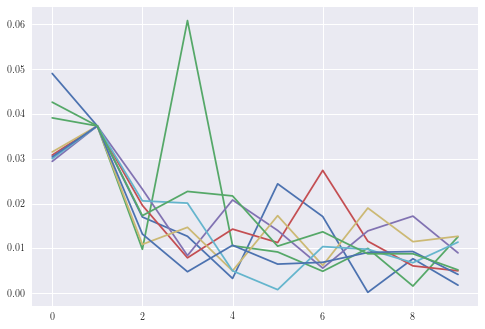

In [6]:
plt.figure()
plt.plot(mv_gauss_5[-11:-1,:])

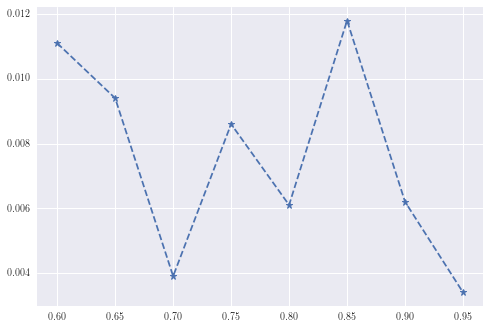

In [7]:
plt.figure()
plt.plot(lambda_vals, mv_gauss_5[-1,:], "--*")

MV Gaussian learnable summary stats

In [8]:
mv_gauss_learn = np.zeros((26, len(lambda_vals)))

for i in range(len(lambda_vals)):
    id_job = 'snpla_' + str(2) + '_' + str(11) + '_' + str(10) + "_" + str(lambda_vals[i])
    p = 'mv_gaussian/low_dim_w_learnable_summary_stats/lambda_val/' + id_job + '.txt'
    mv_gauss_learn[:,i] = read_res_file(p)

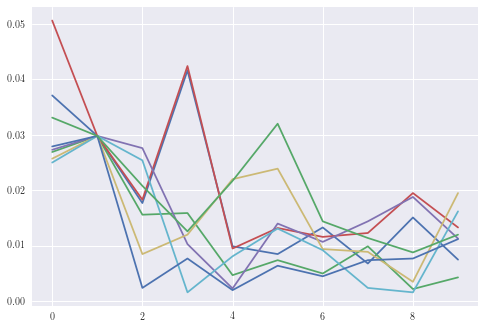

In [9]:
plt.figure()
plt.plot(mv_gauss_learn[-11:-1,:])

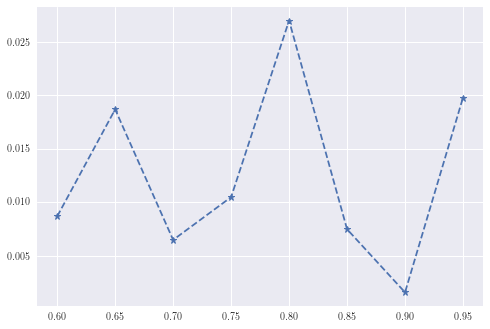

In [10]:
plt.figure()
plt.plot(lambda_vals, mv_gauss_learn[-1,:], "--*")

MV Gaussian summary stats

In [11]:
mv_gauss_stats = np.zeros((26, len(lambda_vals)))

for i in range(len(lambda_vals)):
    id_job = 'snpla_' + str(2) + '_' + str(11) + '_' + str(10) + "_" + str(lambda_vals[i])
    p = 'mv_gaussian/low_dim_w_summary_stats/lambda_val/' + id_job + '.txt'
    mv_gauss_stats[:,i] = read_res_file(p)

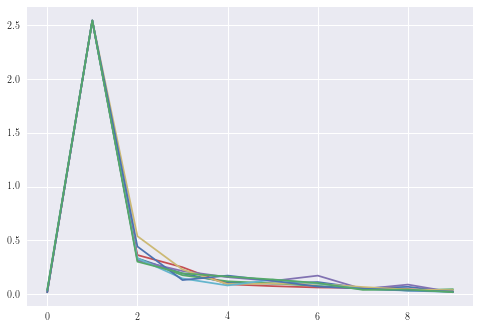

In [12]:
plt.figure()
plt.plot(mv_gauss_stats[-11:-1,:])

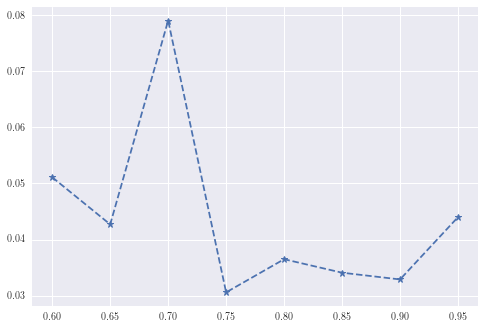

In [13]:
plt.figure()
plt.plot(lambda_vals, mv_gauss_stats[-1,:], "--*")

LV

In [14]:
lv = np.zeros((16, len(lambda_vals)))

for i in range(len(lambda_vals)):
    id_job = 'snpla_'  + str(11) + '_' + str(7) + "_" + str(lambda_vals[i])
    p = 'lotka_volterra/lambda_val/' + id_job + '.txt'
    lv[:,i] = read_res_file(p)

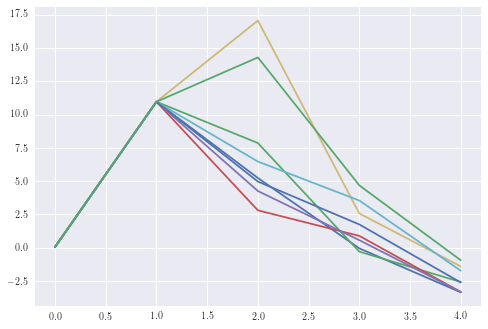

In [15]:
plt.figure()
plt.plot(lv[-6:-1,:])

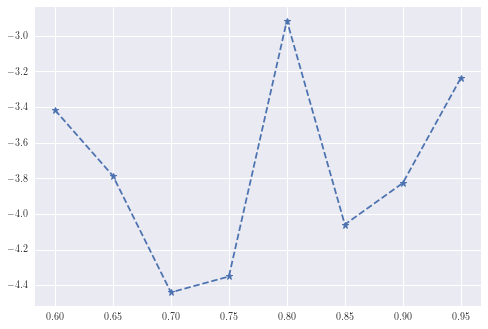

In [16]:
plt.figure()
plt.plot(lambda_vals, lv[-1,:], "--*")

TM

In [17]:
p = 'two_moons/data/true_posterior_' + str(dim)  + '_' + str(1) + '.csv'
analytical_post = read_posterior_samples(p)

In [18]:
nbr_rounds = 5
nbr_samples = 10

In [19]:
snpla_tm_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpla_post_round_i = []
    for j in lambda_vals:
        id_job = str(i+1) + '_' + str(2) + '_' + str(11) + '_' + str(10) + '_' + str(j)
        p = 'two_moons/lambda_val/post_samples_snpla_' + id_job + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_tm_post.append(snpla_post_round_i)

In [20]:
def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

In [21]:
power = 1

In [22]:
tm_snpla_post_emd = np.zeros((nbr_rounds,len(lambda_vals)))

for i in range(nbr_rounds):
    print(i)
    for j in range(len(lambda_vals)):
        tm_snpla_post_emd[i,j] = calc_emd(analytical_post,snpla_tm_post[i][j], power)         


0
1
2
3
4


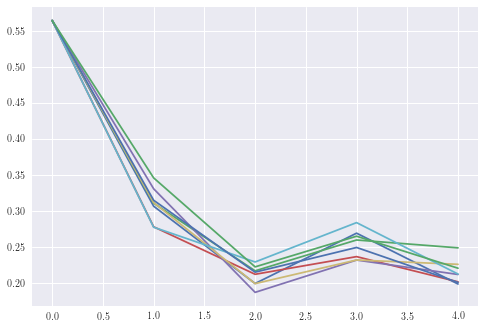

In [23]:
plt.figure()
plt.plot(tm_snpla_post_emd);

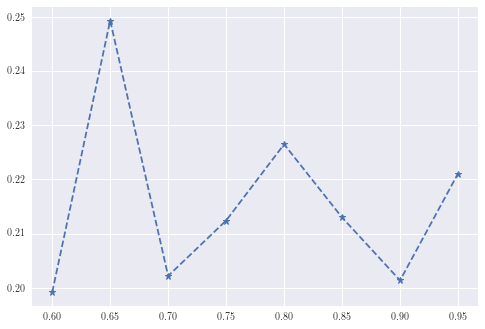

In [24]:
plt.figure()
plt.plot(lambda_vals, tm_snpla_post_emd[-1,:], "--*")

HH

In [49]:
nbr_params = 10
data_set = "snl"

In [50]:
import hodgkin_huxley.HodgkinHuxley as HodgkinHuxley
import hodgkin_huxley.functions as func

model = HodgkinHuxley.HodgkinHuxley(data_set, nbr_params)

In [51]:
theta_true = torch.from_numpy(np.array(model.log_theta_true)).to(dtype=torch.float32)

In [52]:
lambda_vals

[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [54]:
job

'snl_10_200'

In [55]:
nbr_rounds = 12
nbr_samples = 200
nbr_params = 10

job = "snl" + "_" + str(nbr_params) + "_" + str(nbr_samples)

snpla_hh_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds): # should be nbr_rounds later
    snpla_post_round_i = []
    for j in lambda_vals:
        p = 'hodgkin_huxley/lambda_val/post_samples_snpla_' + str(i+1) + '_' + job + '_2_'  + str(j) + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_hh_post.append(snpla_post_round_i)

In [56]:
import torch 
from torch.distributions.multivariate_normal import MultivariateNormal

def fit_gaussian_dist(post_samples):

    mean = np.mean(post_samples, axis=0)
    cov = np.cov(post_samples, rowvar=0)

    return MultivariateNormal(loc=torch.from_numpy(mean).to(dtype=torch.float32),
                              covariance_matrix=torch.from_numpy(cov).to(dtype=torch.float32))


In [57]:
log_prob_snpla = np.zeros((nbr_rounds,len(lambda_vals)))

for i in range(nbr_rounds): 
    for j in range(len(lambda_vals)): 

        log_prob_snpla[i,j] = -fit_gaussian_dist(snpla_hh_post[i][j]).log_prob(theta_true).item()


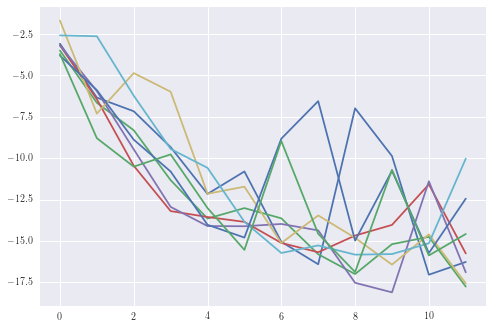

In [58]:
plt.figure()
plt.plot(log_prob_snpla);

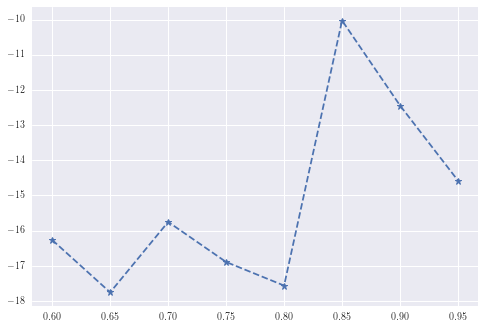

In [60]:
plt.figure()
plt.plot(lambda_vals, log_prob_snpla[-1,:], "--*")

In [34]:
log_prob_snpla.shape

(12, 4)

Joint figure 

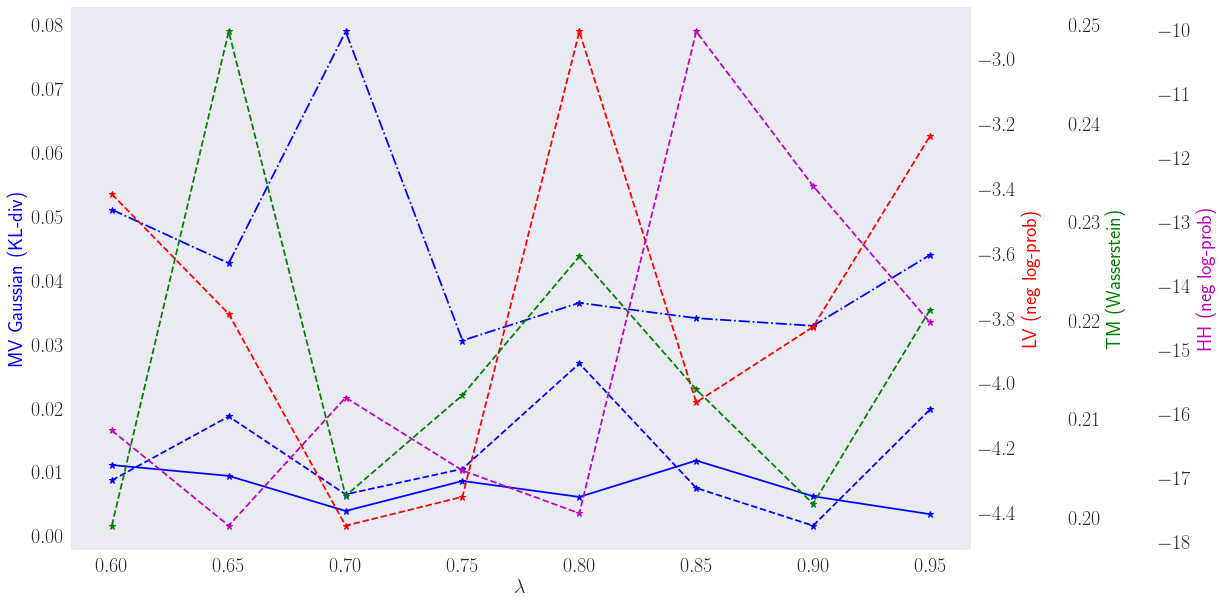

In [62]:
fig, ax = plt.subplots(figsize=(20,10))

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))
axes[-2].spines['right'].set_position(('axes', 1.1))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# Plot MV Gaussian 

axes[0].plot(lambda_vals, mv_gauss_5[-1,:], "-*", color = "b")
axes[0].plot(lambda_vals, mv_gauss_learn[-1,:], "--*", color = "b")
axes[0].plot(lambda_vals, mv_gauss_stats[-1,:], "-.*", color = "b")

axes[1].plot(lambda_vals, lv[-1,:], "--*", color = "r")

axes[2].plot(lambda_vals, tm_snpla_post_emd[-1,:], "--*", color = "g")

axes[3].plot(lambda_vals, log_prob_snpla[-1,:], "--*", color = "m")

axes[0].set_ylabel("MV Gaussian (KL-div)", color="b", fontsize=20)
axes[1].set_ylabel("LV (neg log-prob)", color="r", fontsize=20)
axes[2].set_ylabel("TM (Wasserstein)", color="g", fontsize=20)
axes[3].set_ylabel("HH (neg log-prob)", color="m", fontsize=20)

axes[0].set_xlabel(r'$\lambda$', fontsize=20)

axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[0].tick_params(axis='both', which='minor', labelsize=20)

axes[1].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='minor', labelsize=20)

axes[2].tick_params(axis='both', which='major', labelsize=20)
axes[2].tick_params(axis='both', which='minor', labelsize=20)

axes[3].tick_params(axis='both', which='major', labelsize=20)
axes[3].tick_params(axis='both', which='minor', labelsize=20)

axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)
axes[3].grid(False)

plt.savefig("./analysis/joint_plot.pdf", bbox_inches='tight')

In [95]:
axes

[<AxesSubplot:>,
 <AxesSubplot:label='950926d1-797b-4300-a2e8-34c86641bb63'>,
 <AxesSubplot:label='5e069e8a-ba7b-40f0-b0bc-ac596f43f9bb'>]